In [1]:
import os
import numpy as np
from time import time
from reconstruction.utils import binvox_rw
from reconstruction.utils.plot import plot_vol

In [2]:
folder = '/home/rhermoza/data/3d/Larco-dataset/data'
files = [os.path.join(folder, file) for file in os.listdir(folder)]


Plotting: /home/rhermoza/data/3d/Larco-dataset/data/10_original.off


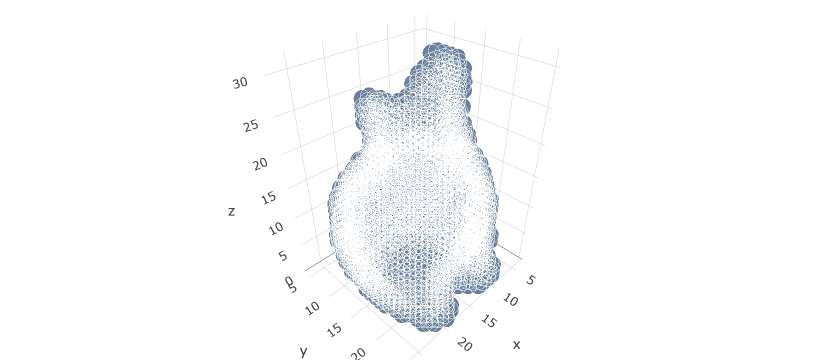

In [10]:
# generate file
file = np.random.choice(files)

def voxels_from_file(file, voxsize=32):
    out_file = file.split('.')[0] + '.binvox'
    file = file.replace(' ', '\ ')
    cmd = f'tools/binvox/binvox -d {voxsize} -cb -e {file}'
            
    if os.path.exists(out_file):
        os.remove(out_file)

    t = os.system(cmd)
    
    if t == 0:
        with open(out_file, 'rb') as f:
            d = binvox_rw.read_as_3d_array(f).data
            d = np.transpose(d, (0, 2, 1)) # fix orientation
        
        os.remove(out_file)
        return 1, d, file.split('/')[-1]
    else:
        return 0, None, None

voxels = voxels_from_file(file, 32)
print('\nPlotting:', file)
plot_vol(voxels[1])

In [14]:
t0 = time()
res = []

for i, file in enumerate(files):
    print(f'{i+1}/{len(files)}', end='\r')
    res.append(voxels_from_file(file, 32))

errors, voxels, filesnames = zip(*res)
print('%.2fs' % (time() - t0))

91.52s


In [15]:
errors = np.array(errors)
voxels = np.array([voxels[i] for i in np.where(errors == 1)[0]])
filesnames = np.array([filesnames[i] for i in np.where(errors == 1)[0]])
labels = np.array(['arq']*voxels.shape[0])
voxels.shape, labels.shape, filesnames.shape

((40, 32, 32, 32), (40,), (40,))

In [16]:
output = {}
output['train'] = {'labels': labels, 'data': voxels, 'errors': [], 'files': filesnames}
np.save('/home/rhermoza/data/3d/Larco-dataset/voxels.npy', output)

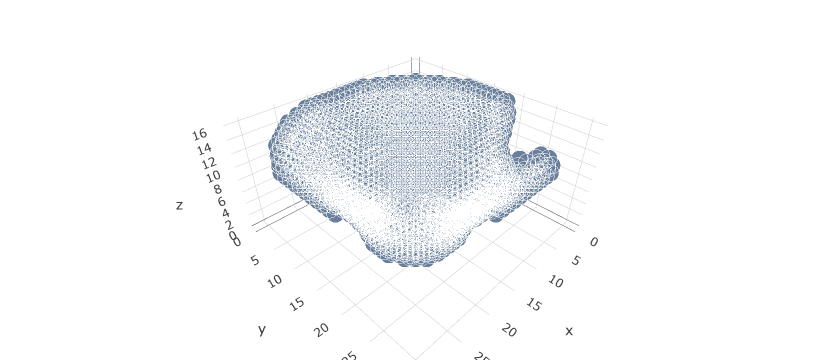

In [17]:
i = np.random.choice(voxels.shape[0])
plot_vol(voxels[i])